# <Font color = yellow> Name: Sara Hesham Hassan </font>

# <font color = yellow> Data Preparation and EDA</font>

In [1]:
# Importing libraries
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the iris dataset
iris = datasets.load_iris()

# Forming the iris in a dataframe
features_df = pd.DataFrame(iris.data, columns=iris.feature_names);

# Show data sample
features_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Target classes (y)
y = iris.target

# Show a sample from the target classes
print(y[:25])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [4]:
# Print the unique classes in the dataset
unique_species = np.unique(y)
print(unique_species)

# Print target names
species_name = iris.target_names
print(species_name)

[0 1 2]
['setosa' 'versicolor' 'virginica']


In [5]:
# Species dictionary
species_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [6]:
# Combine the data and the target in one df
iris_df = features_df.assign(species = y)

# Map target names
iris_df['species_name'] = iris_df['species'].map(species_dict)

# Drop species
iris_df.drop('species', axis=1, inplace=True)

In [7]:
# Show a sample from the new df
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Check for nulls
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species_name         0
dtype: int64

In [9]:
# Check for duplicates
iris_df.duplicated().sum()

1

In [10]:
# Show data shape
print(iris_df.shape)

(150, 5)


In [11]:
# Show data info
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species_name       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# Print the feature description
features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


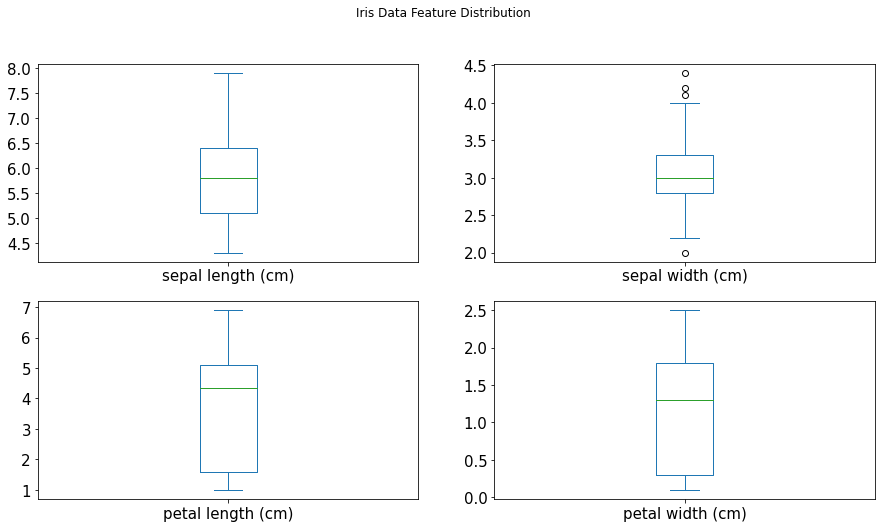

In [13]:
# Show the data distribution for each column
features_df.plot(kind = 'box', figsize = (15,8), subplots = True, layout = (2, 2),  title = "Iris Data Feature Distribution", fontsize=15) ;

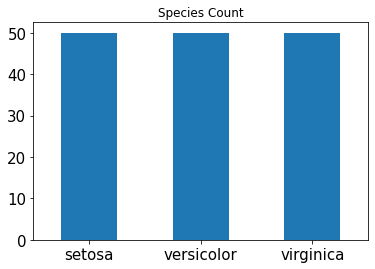

In [14]:
# Show the value counts of the different species
iris_df['species_name'].value_counts().plot(kind='bar', rot=0, title = 'Species Count', fontsize=15);

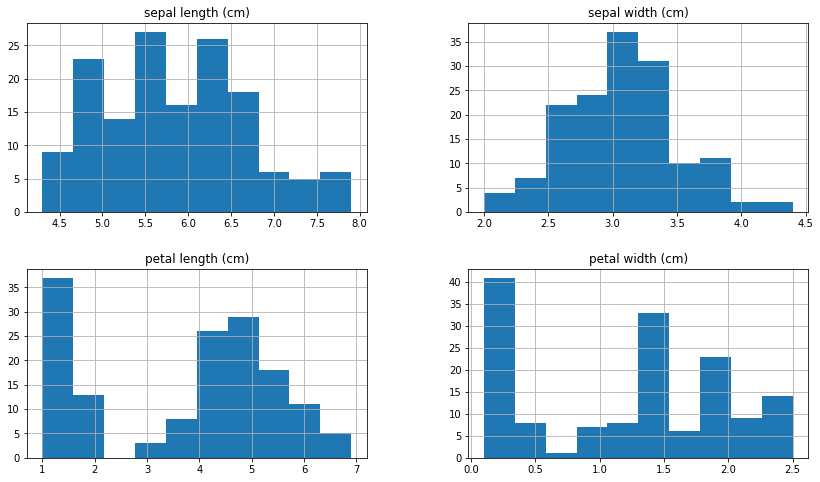

In [15]:
# Show the data distribution for each column
features_df.hist(figsize=(14,8));

from the distribution of `petal length` and `petal width` we can say that there might be different groups in this data.

In [16]:
# # Show the data distribution for each column
# features_df.plot(kind = 'hist', figsize = (15,8), subplots = True, layout = (2, 2),  title = "Iris Data Feature Distribution", alpha= 0.9, fontsize=15) ;

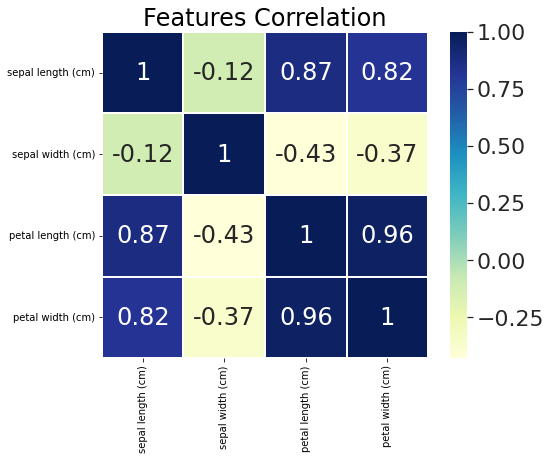

In [17]:
# Show the correlation between features
fig, ax = plt.subplots(figsize=(8, 6));
sns.set(font_scale=2);

# Heatmap
sns.heatmap(features_df.corr(), cmap = "YlGnBu", linecolor = 'white', linewidths = 1, annot= True, square = True).set(title='Features Correlation');
# plt.xticks(rotation=45);

the petal measurements have highly positive correlation. The petal features also have relatively high correlation with sepal_length.

# <font color = yellow> Decision Tree Classifier </font> 

In [18]:
# Import the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
# Extract X, and y
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['species_name']

# Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [20]:
# Decision tree classifier initialization
dtree = DecisionTreeClassifier(max_depth = 3, random_state = 1)

# Fit the classifier to the data
dtree.fit(x_train,y_train)

print('Decision Tree Classifer fitted successfully!')

Decision Tree Classifer fitted successfully!


In [21]:
# Predict the test values
prediction = dtree.predict(x_test)

# Calculate the test accuracy
accuracy = metrics.accuracy_score(prediction, y_test)

# Show result
print("The accuracy of the Decision Tree is {:.2f}".format(accuracy))

The accuracy of the Decision Tree is 0.93


In [22]:
# The importance of each predictor
dtree.feature_importances_

array([0.      , 0.      , 0.041423, 0.958577])

We can deduce that `Sepal measurment` has no importance

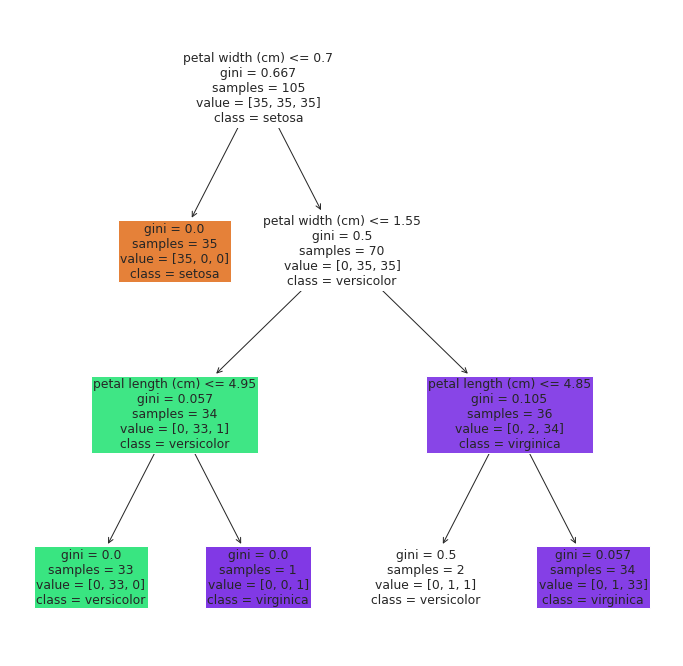

In [23]:
# The classification rules 
plt.figure(figsize = (12,12))
plot_tree(dtree, feature_names = features_df.columns, class_names = species_name, filled = True);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


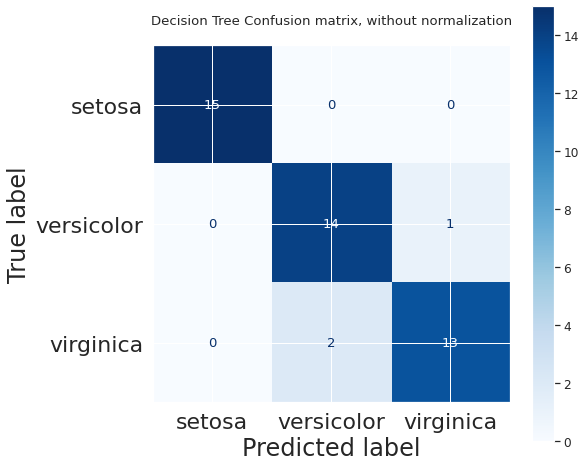

In [24]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(8, 8));
sns.set(font_scale=1.1);

disp = metrics.plot_confusion_matrix(dtree, x_test, y_test,
                                 display_labels= species_name,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 ax = ax);
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization\n');

Only 3 samples are misclassified

## <font color = yellow> Thanks! </font>